In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import altair as alt
from scipy import stats
import tools
plt.style.use('ggplot')

In [40]:
def load_data(file_path):
    return pd.read_parquet(file_path)

seed = 42

In [41]:
products_file = '../data/olist_products_dataset.parquet'
orders_file = '../data/olist_orders_dataset.parquet'
order_items_file = '../data/olist_order_items_dataset.parquet'
customers_file = '../data/olist_customers_dataset.parquet'
geolocation_file = '../data/olist_geolocation_dataset.parquet'
payments_file = '../data/olist_order_payments_dataset.parquet'
reviews_file = '../data/olist_order_reviews_dataset.parquet'
sellers_file = '../data/olist_sellers_dataset.parquet'
category_file = '../data/product_category_name_translation.parquet'

In [42]:
products_df = load_data(products_file)
orders_df = load_data(orders_file)
order_items_df = load_data(order_items_file)
customers_df = load_data(customers_file)
geolocation_df = load_data(geolocation_file)
payments_df = load_data(payments_file)
reviews_df = load_data(reviews_file)
sellers_df = load_data(sellers_file)
category_df = load_data(category_file)

In [43]:
# Merge dos dataframes
orders_products = orders_df.merge(order_items_df, on='order_id', how='inner')
orders_products_customers = orders_products.merge(customers_df, on='customer_id', how='inner')
orders_products_customers_reviews = orders_products_customers.merge(reviews_df, on='order_id', how='inner')
orders_products_customers_reviews_payments = orders_products_customers_reviews.merge(payments_df, on='order_id', how='inner')
orders_products_customers_reviews_payments_sellers = orders_products_customers_reviews_payments.merge(sellers_df, on='seller_id', how='inner')
df = orders_products_customers_reviews_payments_sellers.merge(products_df, on='product_id', how='inner')

In [6]:
df_summary = df.copy()
df_summary.rename(columns=tools.translations, inplace=True)

In [7]:
def resumirtabela(df):
    print(f"Shape: {df.shape}")
    resumo = pd.DataFrame(df.dtypes, columns=['dtypes'])
    resumo = resumo.reset_index()
    resumo['Nome'] = resumo['index']
    resumo = resumo[['Nome', 'dtypes']]
    resumo['Ausentes'] = df.isnull().sum().values
    resumo['Únicos'] = df.nunique().values
    resumo['Primeiro Valor'] = df.loc[0].values
    resumo['Segundo Valor'] = df.loc[1].values
    resumo['Terceiro Valor'] = df.loc[2].values

    for name in resumo['Nome'].value_counts().index:
        resumo.loc[resumo['Nome'] == name, 'Entropia'] = round(
            stats.entropy(df[name].value_counts(normalize=True), base=2), 2)
    return resumo

In [8]:
resumirtabela(df_summary)

Shape: (115609, 40)


,Nome,dtypes,Ausentes,Únicos,Primeiro Valor,Segundo Valor,Terceiro Valor,Entropia
0,ID do Pedido,object,0,96516,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.41
1,ID do Cliente,object,0,96516,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.41
2,Status do Pedido,object,0,7,delivered,delivered,delivered,0.18
3,Data da Compra,object,0,95989,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.40
4,Data de Aprovação do Pedido,object,14,88332,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.24
5,Data de Entrega ao Transportador,object,1195,79241,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.00
6,Data de Entrega ao Cliente,object,2400,93702,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.37
7,Data Estimada de Entrega,object,0,449,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,8.47
8,ID do Item do Pedido,int64,0,21,1,1,1,0.72
9,ID do Produto,object,0,32171,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.60


In [9]:
id_cols = [
    'order_id', 'seller_id', 'customer_id', 'order_item_id',
      'product_id', 'review_id', 'customer_unique_id', 'seller_zip_code_prefix']

cat_cols = df.nunique()[df.nunique() <= 27].keys().tolist()

num_cols = num_cols = ['review_score', 'payment_sequential', 'payment_installments',
                   'payment_value', 'price', 'freight_value', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

multi_cols = [i for i in cat_cols if i not in bin_cols]

timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']

In [10]:
corr = df[num_cols].corr()

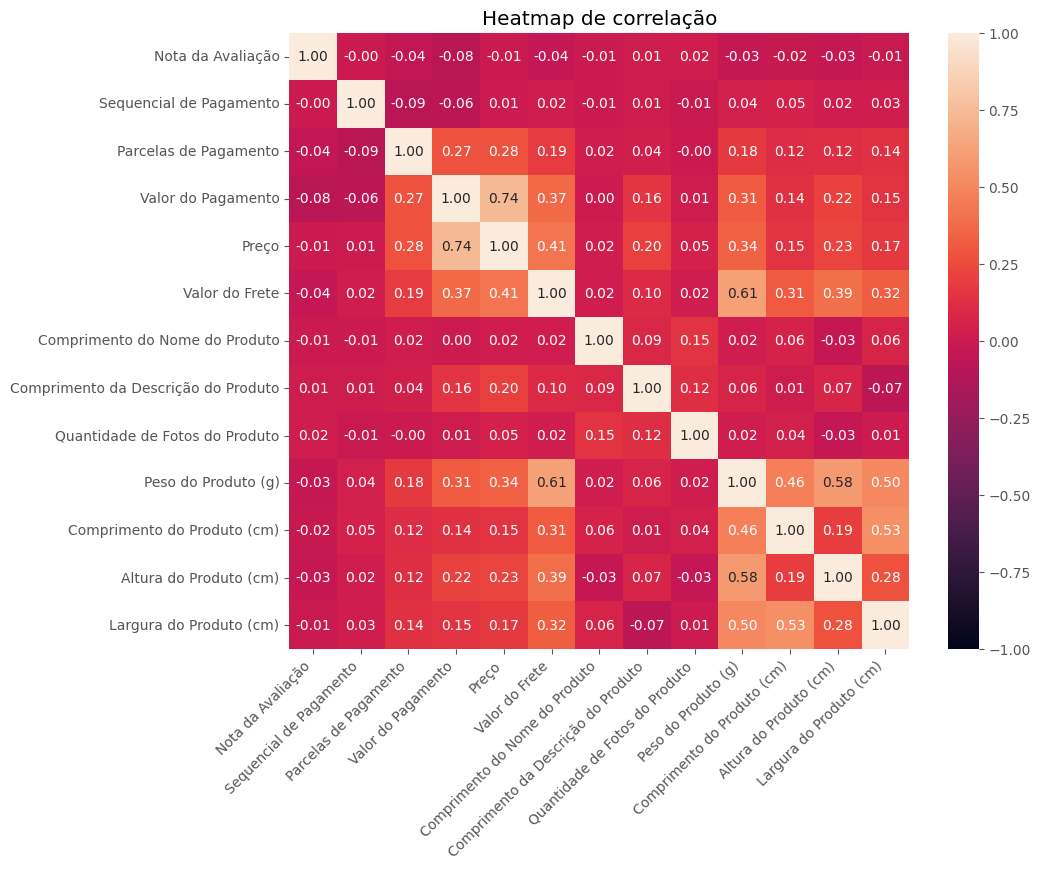

In [11]:
plt.figure(figsize=(10, 8))
g1 = sns.heatmap(corr,  norm=plt.Normalize(-1, 1), annot=True, fmt='.2f')
plt.title("Heatmap de correlação")
y_labels = [label.get_text() for label in g1.get_yticklabels()]
translated_y_labels = [tools.translations.get(label, label) for label in y_labels]
g1.set_yticklabels(translated_y_labels, rotation=0)

x_labels = [label.get_text() for label in g1.get_xticklabels()]
translated_x_labels = [tools.translations.get(label, label) for label in x_labels]
g1.set_xticklabels(translated_x_labels, rotation=45, ha='right')
plt.show()

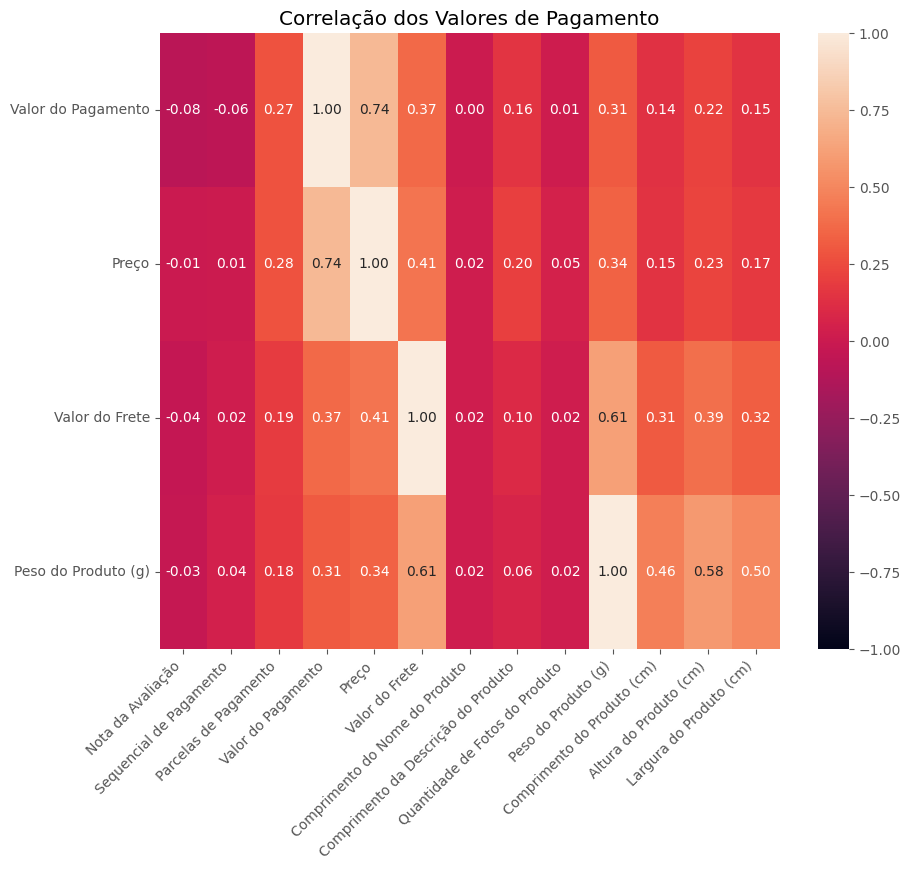

In [12]:
plt.figure(figsize=(10,8))
plt.title("Correlação dos Valores de Pagamento")
corr_payment_value = corr.loc[(corr['payment_value'] > 0.3) | (corr['payment_value'] <= -0.3)]
g1 = sns.heatmap(corr_payment_value, norm=plt.Normalize(-1, 1), annot=True, fmt='.2f')
y_labels = [label.get_text() for label in g1.get_yticklabels()]
translated_y_labels = [tools.translations.get(label, label) for label in y_labels]
g1.set_yticklabels(translated_y_labels, rotation=0)

x_labels = [label.get_text() for label in g1.get_xticklabels()]
translated_x_labels = [tools.translations.get(label, label) for label in x_labels]
g1.set_xticklabels(translated_x_labels, rotation=45, ha='right')
plt.show()

In [13]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

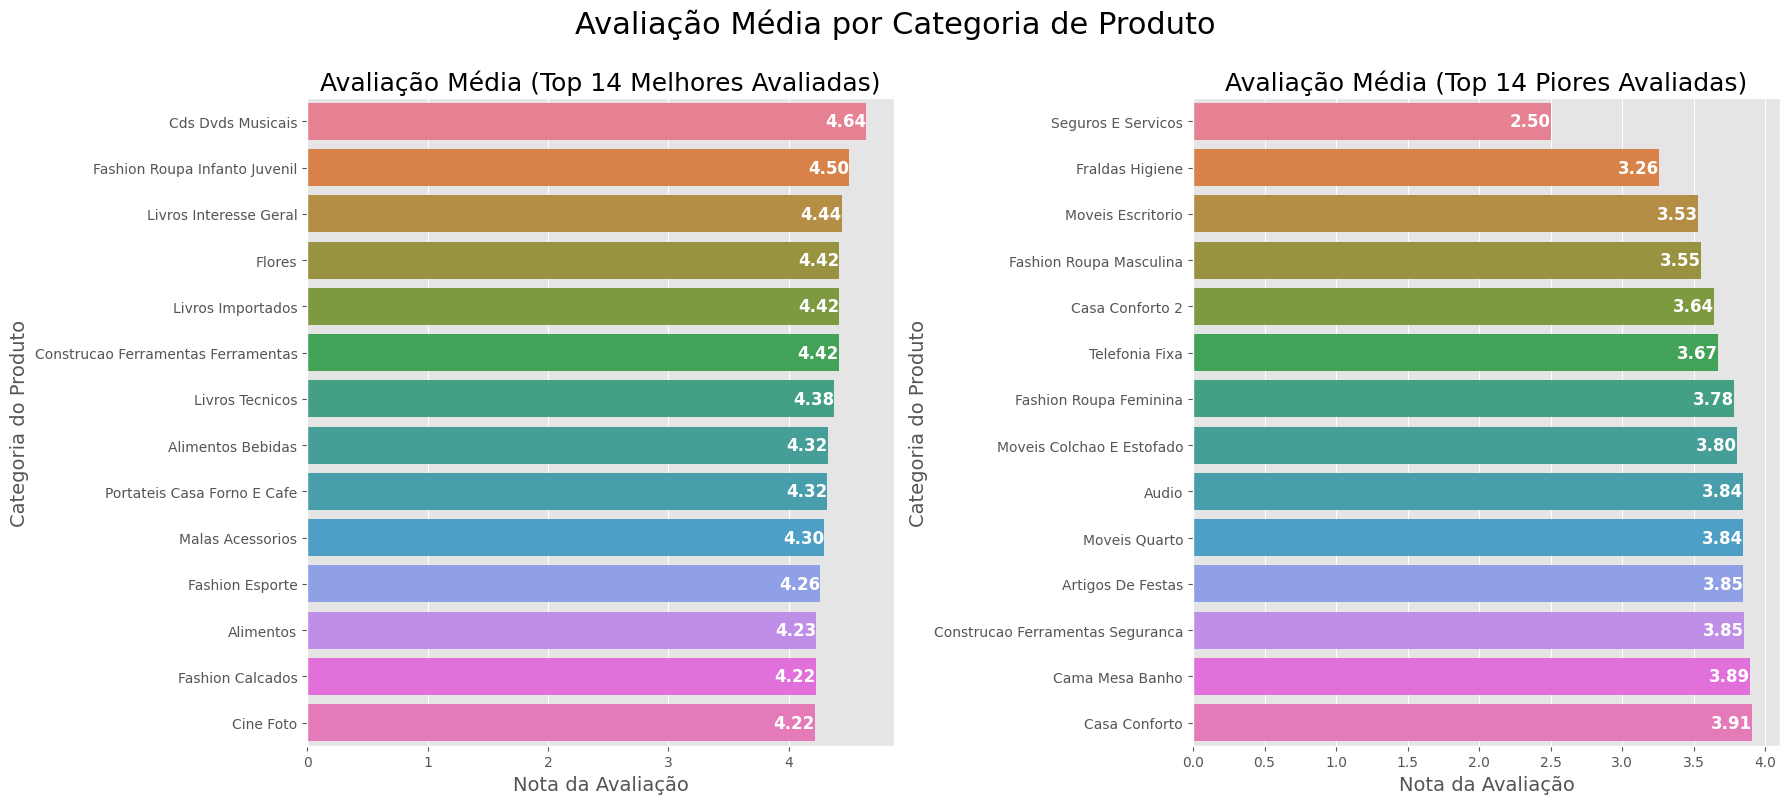

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

avg_rating_best = df.groupby('product_category_name')['review_score'].mean().reset_index()
avg_rating_best['product_category_name'] = avg_rating_best['product_category_name'].apply(lambda x: x.replace('_', ' ').title())
top_categories_best = avg_rating_best.nlargest(14, 'review_score')
barplot_best = sns.barplot(data=top_categories_best, x='review_score', y='product_category_name', ax=axes[0], hue='product_category_name')
axes[0].set_title('Avaliação Média', fontsize=18)
axes[0].set_xlabel('Nota da Avaliação', fontsize=14)
axes[0].set_ylabel('Categoria do Produto', fontsize=14)

for p in barplot_best.patches:
    barplot_best.annotate(f'{p.get_width():.2f}', 
                          (p.get_width(), p.get_y() + p.get_height() / 2), 
                          ha='right', va='center', 
                          color='white', fontsize=12,fontweight='bold')

avg_rating_worst = df.groupby('product_category_name')['review_score'].mean().reset_index()
avg_rating_worst['product_category_name'] = avg_rating_worst['product_category_name'].apply(lambda x: x.replace('_', ' ').title())
top_categories_worst = avg_rating_worst.nsmallest(14, 'review_score')
barplot_worst = sns.barplot(data=top_categories_worst, x='review_score', y='product_category_name', ax=axes[1], hue='product_category_name')
axes[1].set_title('Avaliação Média (Top 14 Piores Avaliadas)', fontsize=18)
axes[1].set_xlabel('Nota da Avaliação', fontsize=14)
axes[1].set_ylabel('Categoria do Produto', fontsize=14)

for p in barplot_worst.patches:
    barplot_worst.annotate(f'{p.get_width():.2f}', 
                           (p.get_width(), p.get_y() + p.get_height() / 2), 
                           ha='right', va='center', 
                           color='white', fontsize=12, fontweight='bold')

plt.suptitle('Avaliação Média por Categoria de Produto', fontsize=22, y=1.0, ha='center')

plt.tight_layout()
plt.show()

In [15]:
df_sample = df.sample(500, random_state=seed)

In [16]:
df_sample['product_weight_g'] = df_sample['product_weight_g'].apply(lambda x: x/1000)
df_sample = df_sample.rename(columns={'product_weight_g': 'Peso do Produto (Kg)'})

In [17]:
payment_value_q99 = df_sample['payment_value'].quantile(0.99)
df_sample = df_sample[df_sample['payment_value'] < payment_value_q99]

In [18]:
freight_value_q99 = df_sample['freight_value'].quantile(0.99)
df_sample = df_sample[df_sample['freight_value'] < freight_value_q99]

In [19]:
product_weight_q95 = df_sample['Peso do Produto (Kg)'].quantile(0.95)
df_sample = df_sample[df_sample['Peso do Produto (Kg)'] < product_weight_q95]

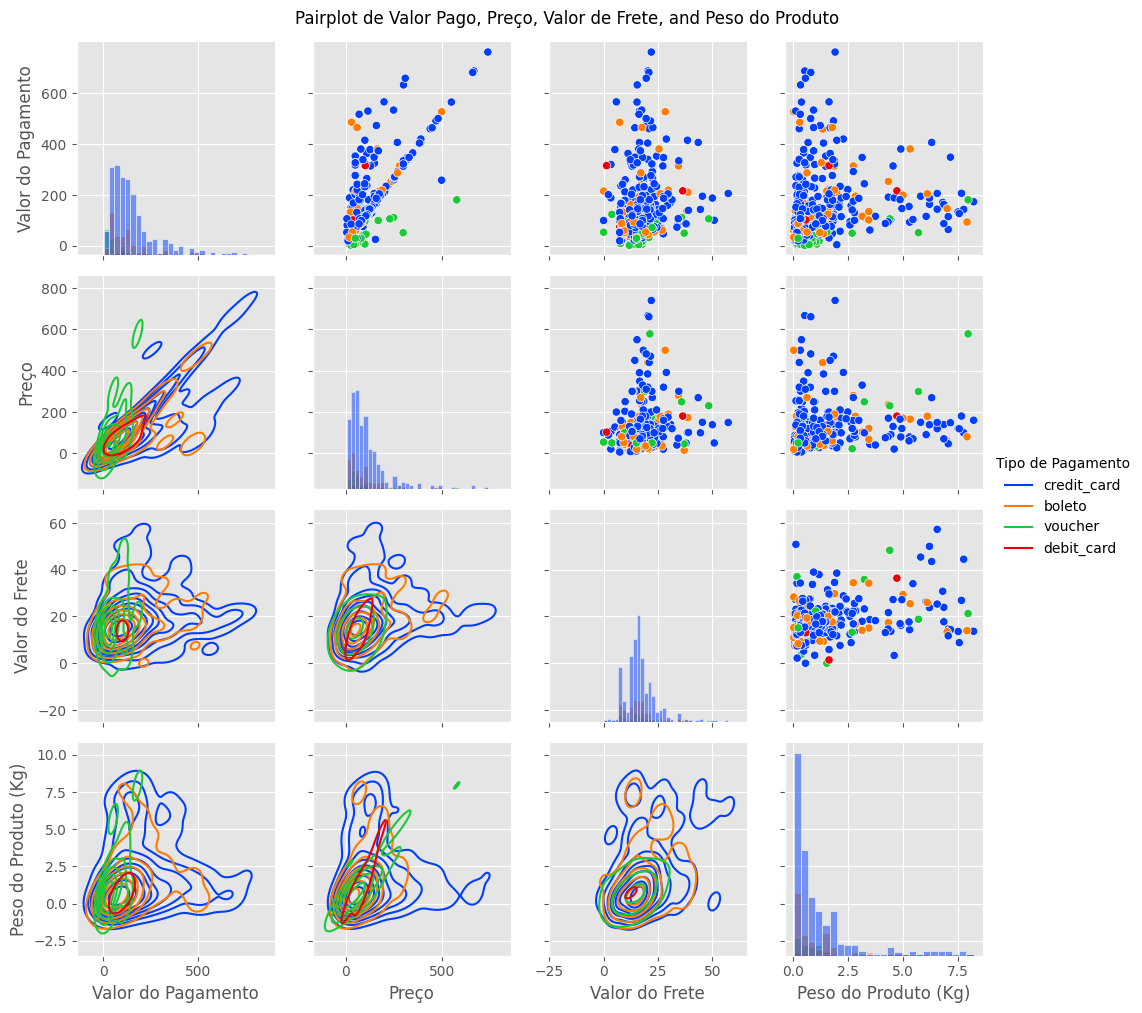

In [20]:
df_sample.rename(columns=tools.translations, inplace=True)

g = sns.PairGrid(df_sample, hue='Tipo de Pagamento',
                 vars=['Valor do Pagamento', 'Preço', 'Valor do Frete', 'Peso do Produto (Kg)'], palette='bright')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()
g.figure.suptitle('Pairplot de Valor Pago, Preço, Valor de Frete, and Peso do Produto', y=1.01)
plt.show()

## Distribuição dos preços

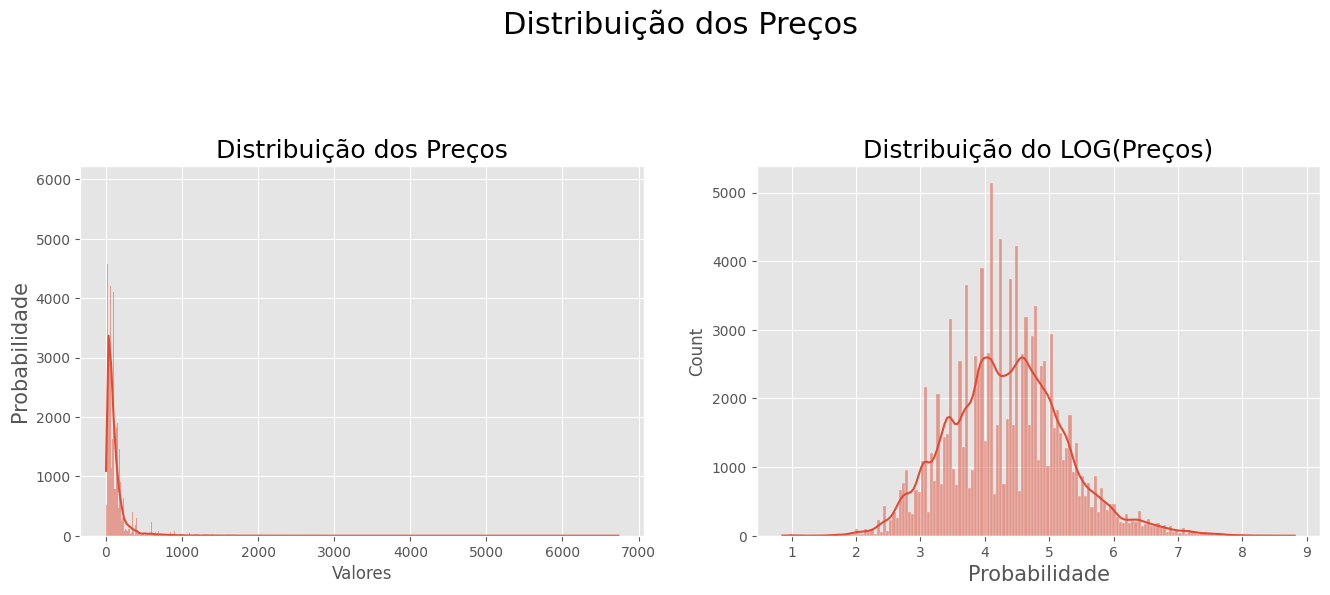

In [21]:
df.fillna({'price': -1}, inplace=True)

plt.figure(figsize=(16, 12))
plt.suptitle('Distribuição dos Preços', fontsize=22)
plt.subplot(221)
g = sns.histplot(df['price'], kde=True)
g.set_title('Distribuição dos Preços', fontsize=18)
g.set_xlabel('Valores')
g.set_ylabel('Probabilidade', fontsize=15)

plt.subplot(222)
g1 = sns.histplot(np.log(df['price']+1.5), kde=True)
g1.set_title("Distribuição do LOG(Preços)", fontsize=18)
g1.set_xlabel("Valores")
g1.set_xlabel("Probabilidade", fontsize=15)

plt.subplots_adjust(hspace=0.4, top=0.85)

plt.show()

In [22]:
media_precos = df['price'].mean()
desvio_padrao_precos = df['price'].std()
print(f"Média dos preços é: {media_precos}\nDesvio Padrão é: {desvio_padrao_precos}")

Média dos preços é: 120.61984957918503
Desvio Padrão é: 182.6534760260345


# Tipos de Pagamento

In [23]:
df['price_log'] = np.log(df['price'] + 1.5)

C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\2621001066.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(payment_typle_labels)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\2621001066.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(payment_typle_labels)


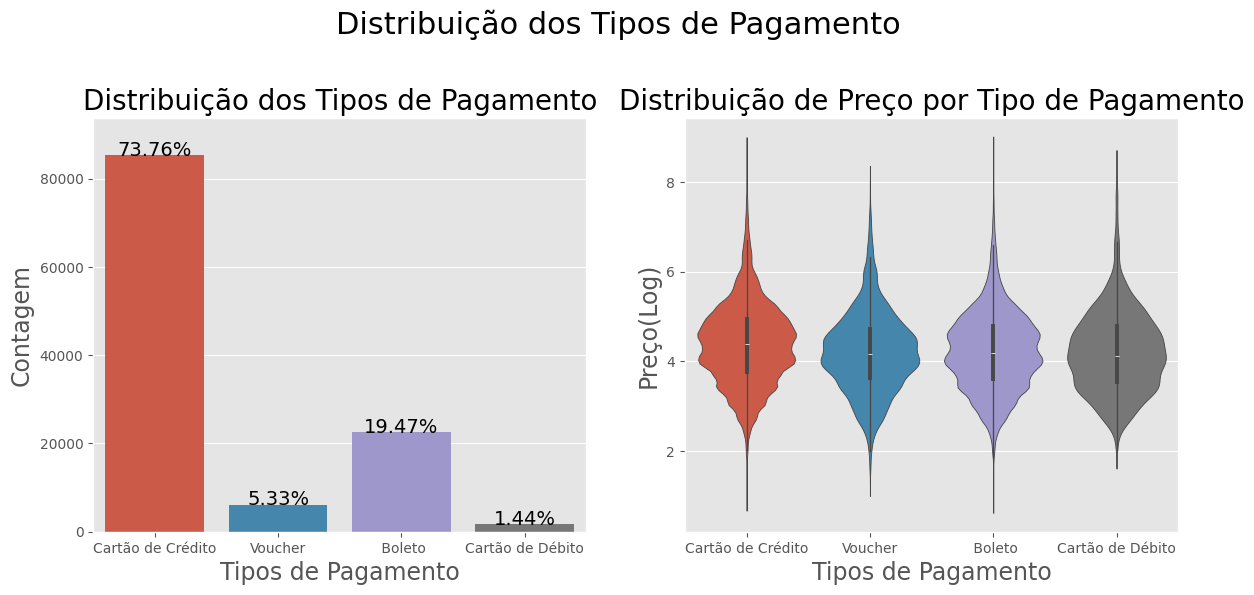

In [24]:
total = len(df)
payment_typle_labels = ['Cartão de Crédito', 'Voucher', ' Boleto', 'Cartão de Débito']

plt.figure(figsize=(14,6))

plt.suptitle('Distribuição dos Tipos de Pagamento', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df[df['payment_type'] != 'not_defined'], hue='payment_type')
g.set_title("Distribuição dos Tipos de Pagamento", fontsize=20)
g.set_xticklabels(payment_typle_labels)
g.set_xlabel("Tipos de Pagamento", fontsize=17)
g.set_ylabel("Contagem", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(122)
g = sns.violinplot(x='payment_type', y='price_log', data=df[df['payment_type'] != 'not_defined'], hue='payment_type')
g.set_title("Distribuição de Preço por Tipo de Pagamento", fontsize=20)
g.set_xlabel("Tipos de Pagamento", fontsize=17)
g.set_xticklabels(payment_typle_labels)
g.set_ylabel("Preço(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\2390289422.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g_ticks,rotation=45)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\2390289422.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2_ticks,rotation=45)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\2390289422.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(g3_ticks,rotation=45)


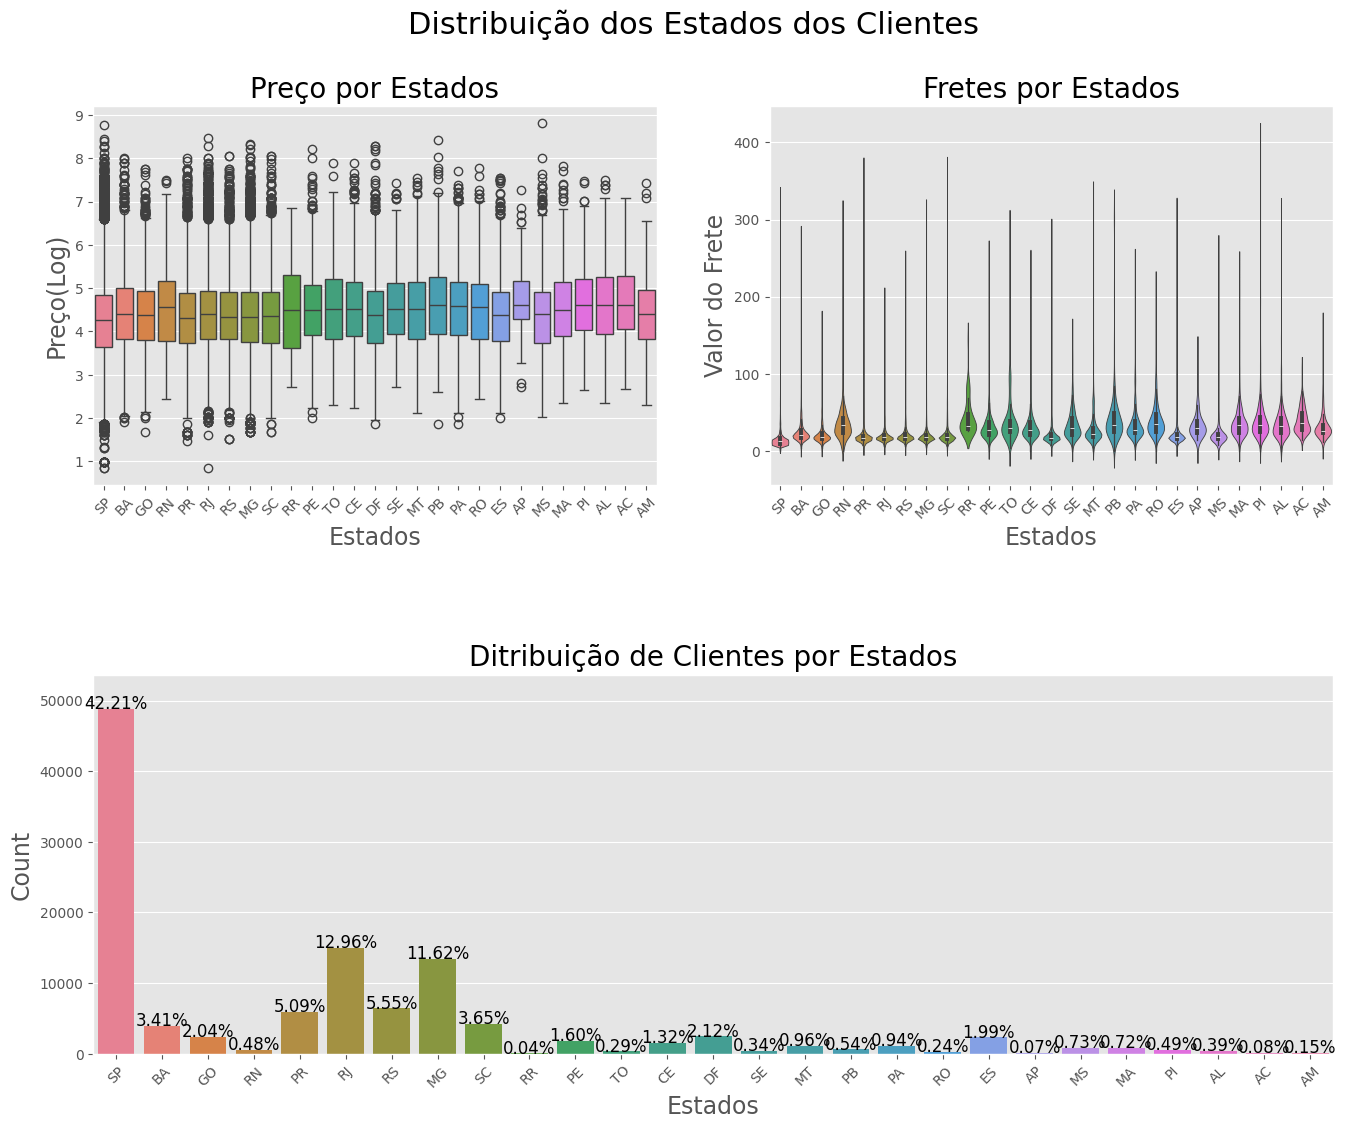

In [25]:
plt.figure(figsize=(16,12))

plt.suptitle('Distribuição dos Estados dos Clientes', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df, orient='h', hue='customer_state')
g.set_title("Ditribuição de Clientes por Estados", fontsize=20)
g.set_xlabel("Estados", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g_ticks = g.get_xticklabels()
g.set_xticklabels(g_ticks,rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df[df['price'] != -1], hue='customer_state')
g2.set_title("Preço por Estados", fontsize=20)
g2.set_xlabel("Estados", fontsize=17)
g2.set_ylabel("Preço(Log)", fontsize=17)
g2_ticks = g2.get_xticklabels()
g2.set_xticklabels(g2_ticks,rotation=45)

plt.subplot(222)
g3 = sns.violinplot(x='customer_state', y='freight_value', 
                 data=df[df['price'] != -1], hue='customer_state')
g3.set_title("Fretes por Estados", fontsize=20)
g3.set_xlabel("Estados", fontsize=17)
g3.set_ylabel("Valor do Frete", fontsize=17)
g3_ticks = g3.get_xticklabels()
g3.set_xticklabels(g3_ticks,rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\3651909600.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g_ticks,rotation=45)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\3651909600.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2_ticks,rotation=45)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\3651909600.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(g3_ticks, rotation=45)


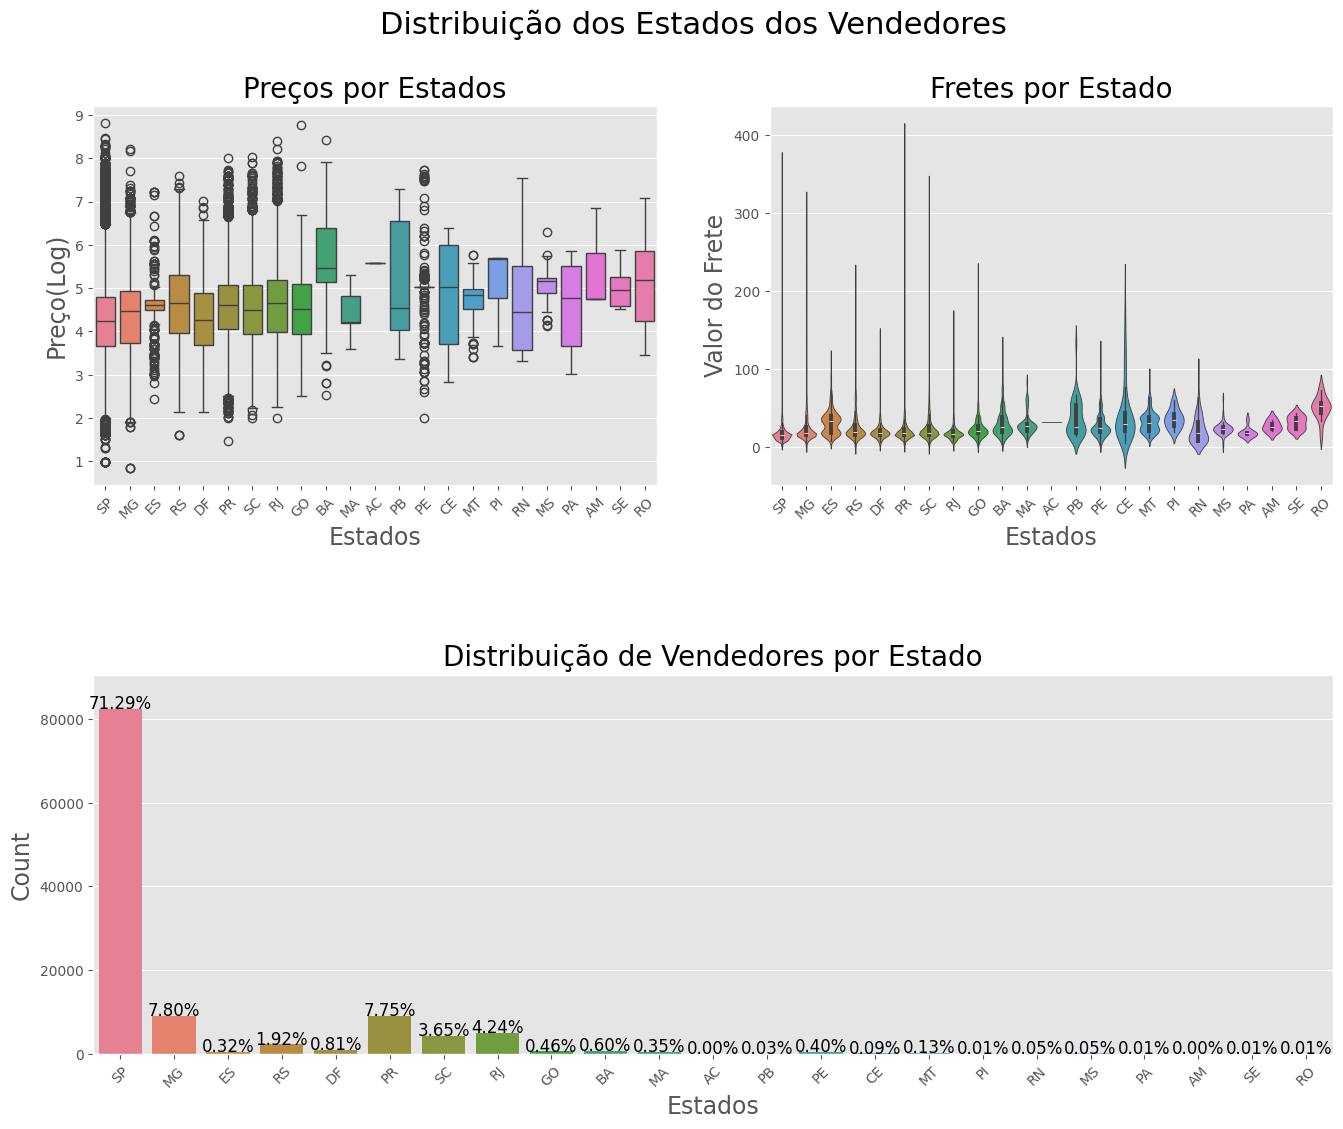

In [26]:
plt.figure(figsize=(16,12))

plt.suptitle('Distribuição dos Estados dos Vendedores', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df, orient='h', hue='seller_state')
g.set_title("Distribuição de Vendedores por Estado", fontsize=20)
g.set_xlabel("Estados", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g_ticks = g.get_xticklabels()
g.set_xticklabels(g_ticks,rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df[df['price'] != -1], hue='seller_state')
g2.set_title("Preços por Estados", fontsize=20)
g2.set_xlabel("Estados", fontsize=17)
g2.set_ylabel("Preço(Log)", fontsize=17)
g2_ticks = g2.get_xticklabels()
g2.set_xticklabels(g2_ticks,rotation=45)

plt.subplot(222)
g3 = sns.violinplot(x='seller_state', y='freight_value', 
                 data=df[df['price'] != -1], hue='seller_state')
g3.set_title("Fretes por Estado", fontsize=20)
g3.set_xlabel("Estados", fontsize=17)
g3.set_ylabel("Valor do Frete", fontsize=17)
g3_ticks = g3.get_xticklabels()
g3.set_xticklabels(g3_ticks, rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [27]:
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col])

In [28]:
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year)
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,2018,7,Jul,201807,20180724,24,1,Tue,20,Noite
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,2018,8,Aug,201808,20180808,8,2,Wed,8,Manhã


C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\1715275954.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(weekday_label)
C:\Users\Otavio Leite\AppData\Local\Temp\ipykernel_14384\1715275954.py:64: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


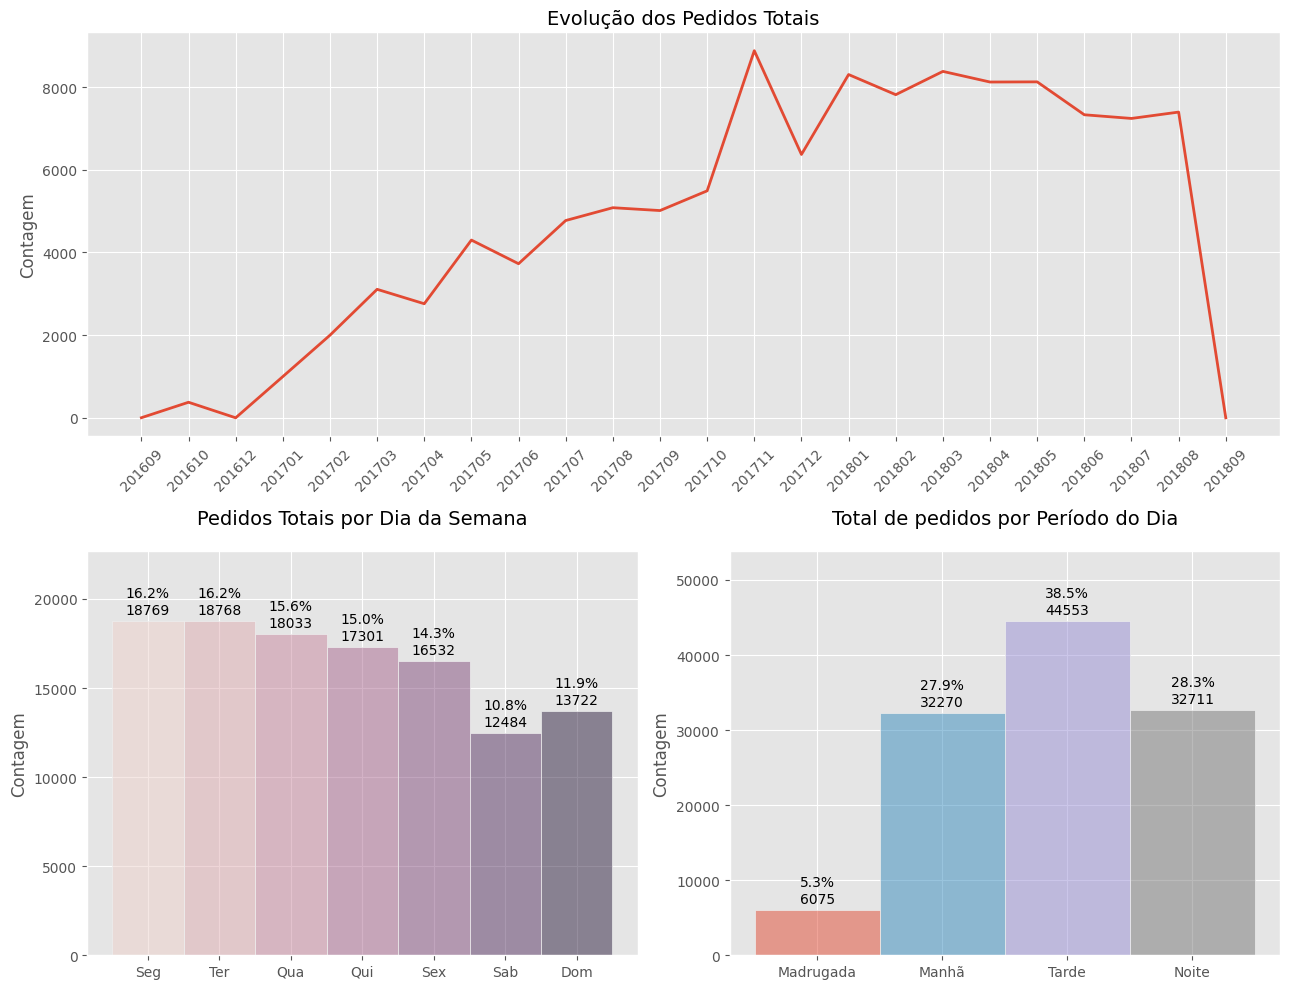

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

sns.lineplot(data=df['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, linewidth=2)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolução dos Pedidos Totais', size=14)
ax1.set_ylabel(ylabel='Contagem')
ax1.set_xlabel(xlabel='')

sns.histplot(df, x='order_purchase_dayofweek', ax=ax2, hue='order_purchase_dayofweek', legend=False,discrete=True)
weekday_label = ['Days', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Pedidos Totais por Dia da Semana', size=14, pad=20)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.15)
ax2.set_ylabel(ylabel='Contagem')
ax2.set_xlabel(xlabel='')

total = len(df['order_purchase_dayofweek'])
for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        # Adiciona número absoluto
        ax2.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')
        # Adiciona porcentagem
        ax2.annotate(f'{height/total:.1%}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 20), 
                    textcoords='offset points')

day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
sns.histplot(df, x='order_purchase_time_day', ax=ax3, hue='order_purchase_time_day', legend=False)
ax3.set_title('Total de pedidos por Período do Dia', size=14, pad=20)
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.15)
ax3.set_ylabel(ylabel='Contagem')
ax3.set_xlabel(xlabel='')

total = len(df['order_purchase_time_day'])
for p in ax3.patches:
    height = p.get_height()
    if height > 0:
        # Adiciona número absoluto
        ax3.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')
        # Adiciona porcentagem
        ax3.annotate(f'{height/total:.1%}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 20), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [30]:
df_w_commercial_dates = pd.read_parquet("../data/outputs/df_w_commercial_dates.parquet")
df_w_commercial_dates

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,order_purchase_timestamp_droppable,closest_commercial_date,commercial_date_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,201710,20171002,2,0,Mon,10,Manhã,2017-10-02 10:56:33,2017-10-12,Dia das Criancas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,201710,20171002,2,0,Mon,10,Manhã,2017-10-02 10:56:33,2017-10-12,Dia das Criancas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,201710,20171002,2,0,Mon,10,Manhã,2017-10-02 10:56:33,2017-10-12,Dia das Criancas
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,201807,20180724,24,1,Tue,20,Noite,2018-07-24 20:41:37,2018-08-12,Dia dos Pais
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,201808,20180808,8,2,Wed,8,Manhã,2018-08-08 08:38:49,2018-08-12,Dia dos Pais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,201802,20180206,6,1,Tue,12,Manhã,2018-02-06 12:58:58,2018-03-08,Dia da Mulher
115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,201708,20170827,27,6,Sun,14,Tarde,2017-08-27 14:46:43,2017-08-13,Dia dos Pais
115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,201801,20180108,8,0,Mon,21,Noite,2018-01-08 21:28:27,2018-01-01,Reveillon
115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,201801,20180108,8,0,Mon,21,Noite,2018-01-08 21:28:27,2018-01-01,Reveillon


In [31]:
df_w_commercial_dates[['closest_commercial_date', 'commercial_date_name']]

,closest_commercial_date,commercial_date_name
0,2017-10-12,Dia das Criancas
1,2017-10-12,Dia das Criancas
2,2017-10-12,Dia das Criancas
3,2018-08-12,Dia dos Pais
4,2018-08-12,Dia dos Pais
...,...,...
115604,2018-03-08,Dia da Mulher
115605,2017-08-13,Dia dos Pais
115606,2018-01-01,Reveillon
115607,2018-01-01,Reveillon


In [32]:
df_w_commercial_dates = df_w_commercial_dates.drop(columns='order_purchase_timestamp_droppable')

In [33]:
def is_within_influence_window(order_date, commercial_date, before_weeks=2, after_weeks=1):
    window_start = commercial_date - pd.Timedelta(weeks=before_weeks)
    window_end = commercial_date + pd.Timedelta(weeks=after_weeks)
    return window_start <= order_date <= window_end

def find_commercial_influence(order_date, commercial_dates_df, before_weeks=2, after_weeks=1):
    for index, row in commercial_dates_df.iterrows():
        if is_within_influence_window(order_date, row['Datas'], before_weeks, after_weeks):
            return row['Datas'], row['Nomes'] 
    return None, None 

In [34]:
df_w_commercial_dates['days_diff'] = (df_w_commercial_dates['closest_commercial_date'] - df_w_commercial_dates['order_purchase_timestamp']).dt.days

In [35]:
df_w_commercial_dates['within_2_weeks'] = df_w_commercial_dates['days_diff'].apply(lambda x: -14 <= x <= 14)

In [36]:
df_sorted = df_w_commercial_dates.copy()
df_sorted['commercial_month'] = df_sorted['closest_commercial_date'].dt.month

# Ordenando o DataFrame pelo mês
df_sorted.sort_values(by='commercial_month', inplace=True)

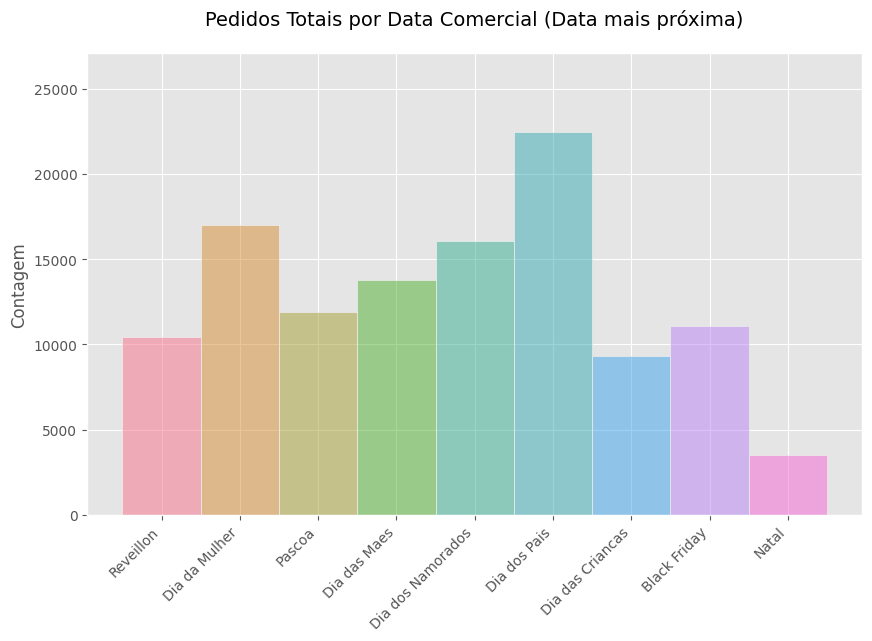

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df_sorted, x='commercial_date_name', ax=ax, hue='commercial_date_name', legend=False, discrete=True)

ax.set_title('Pedidos Totais por Data Comercial (Data mais próxima)', size=14, pad=20)
ax.set_ylabel('Contagem')
ax.set_xlabel('')
# Aumentar o limite do eixo y
ax.set_ylim(0, ax.get_ylim()[1] * 1.15)

plt.xticks(rotation=45, ha='right')

plt.show()

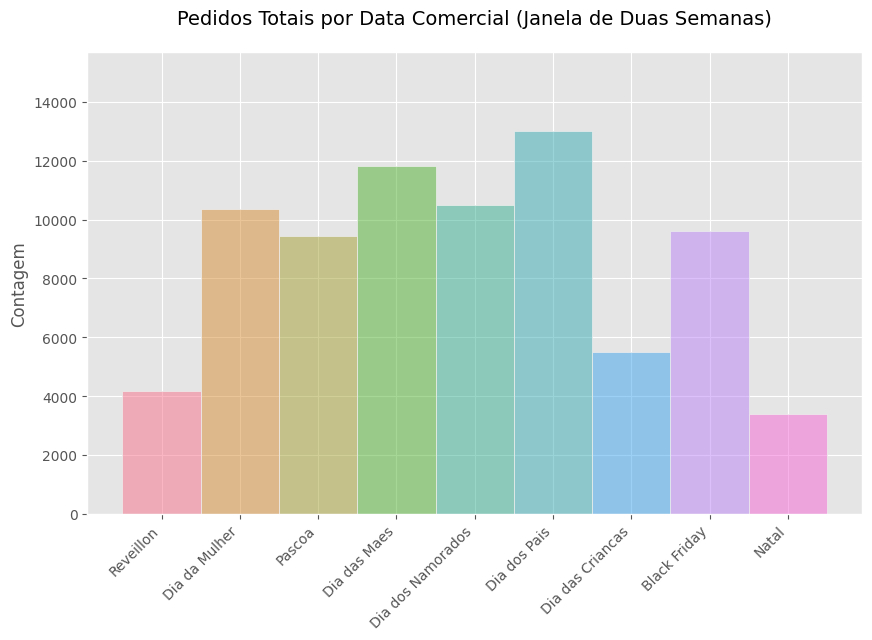

In [38]:
df_sorted = df_sorted[df_sorted['within_2_weeks'] == True]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df_sorted, x='commercial_date_name', ax=ax, hue='commercial_date_name', legend=False, discrete=True)

ax.set_title('Pedidos Totais por Data Comercial (Janela de Duas Semanas)', size=14, pad=20)
ax.set_ylabel('Contagem')
ax.set_xlabel('')

ax.set_ylim(0, ax.get_ylim()[1] * 1.15)

plt.xticks(rotation=45, ha='right')

plt.show()